# PRACTICA 3
## Diego Fernando Valle Morales
## Carné: 20003022

# TEMA KNN


In [26]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import tensorflow as tf
%reload_ext tensorboard

import tensorboard
tensorboard.__version__

'2.2.2'

In [27]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [6]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [7]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [8]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [9]:
len(features)

10222

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


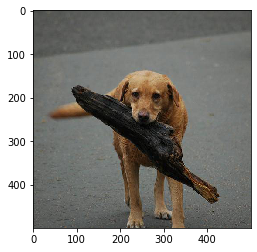

In [10]:
# Indice 4

print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)

### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes  definir tu función para predecir la raza sobre un punto x_predict ,a través de uscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite(la moda) correspondiente a esos "k" valores de X_train , este "y" estará dado por Y_train.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN
2. Agregar el grafo de tensorboard
3. Ejecutar el modelo con las 2 imagenes de prueba.

In [54]:
logs_dir = r"C:\Users\diego\StatisticalLearning\Practica3\logs"

def predecir_raza_KNN(x_predict,X_train,Y_train,k):
    
    y = None
    grafo = tf.Graph()
    with grafo.as_default():
        EntrenaX = tf.placeholder(tf.float32, shape = None, name = "EntrenaX")
        PrediceX = tf.placeholder(tf.float32, shape = None, name="PrediceX")
        Y_labels_Ent =tf.placeholder(tf.string, name="Y_labels_Ent")
        menosUno = tf.constant(-1.0, dtype=tf.float32)
        #writer = tf.summary.FileWriter(logs_dir)
        
        with tf.name_scope("Distancia"):
            distancia = tf.sqrt( tf.reduce_sum( tf.pow( tf.subtract(EntrenaX, tf.expand_dims(PrediceX, 0)), 2.), axis = 2) , name = "Distancia")
            neg_distancia=tf.multiply(distancia, menosUno)
        with tf.name_scope("Clasificador"):
            vals, indx = tf.nn.top_k(neg_distancia, k)
            top_k_label = tf.gather(Y_labels_Ent, indx, name = "Max_etiquetas")
            ind_max = tf.argmax(indx)

    with tf.Session(graph = grafo) as sess: 
        caso, cod = sess.run([top_k_label, ind_max], feed_dict = {EntrenaX : X_train, PrediceX : np.reshape(x_predict, [1, 2048]), Y_labels_Ent : Y_train})
        writer = tf.summary.FileWriter(logs_dir,sess.graph)
        writer.close() 
    y= caso[cod][0][0]
    return (y) #asigna a "y" la predicción resulatnte

In [22]:
test_features = np.load('./data/test/test_inception_features_array.npy')
predice = test_features [0]
formato = predice.shape[0]

## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [23]:
test_features = np.load('./data/test/test_inception_features_array.npy')

### Prueba 1

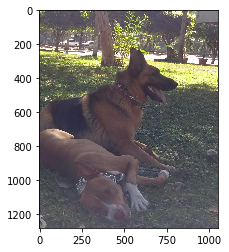

In [24]:
img_test = imio.imread('./data/test/test1.jpg')
plt.imshow(img_test)

In [55]:
predict_image = test_features[0]

## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd

predecir_raza_KNN(predict_image, features, labels,5)

b'german_shepherd'

### Prueba 2

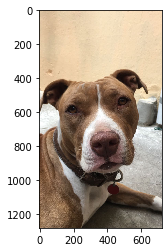

In [56]:
img_test = imio.imread('./data/test/test2.jpg')
plt.imshow(img_test)

In [57]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]
predecir_raza_KNN(predict_image, features, labels, 10)

b'american_staffordshire_terrier'

In [59]:
%tensorboard --logdir="C:\Users\diego\StatisticalLearning\Practica3\logs"

Reusing TensorBoard on port 6006 (pid 16512), started 0:02:37 ago. (Use '!kill 16512' to kill it.)

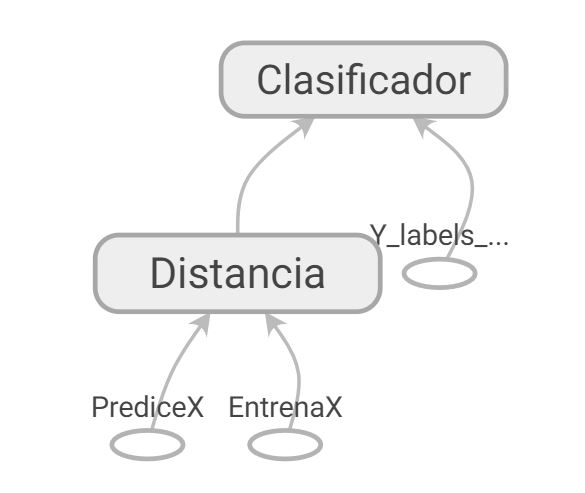

In [60]:
from IPython.display import Image
Image(filename='grafoKNN.jpg')

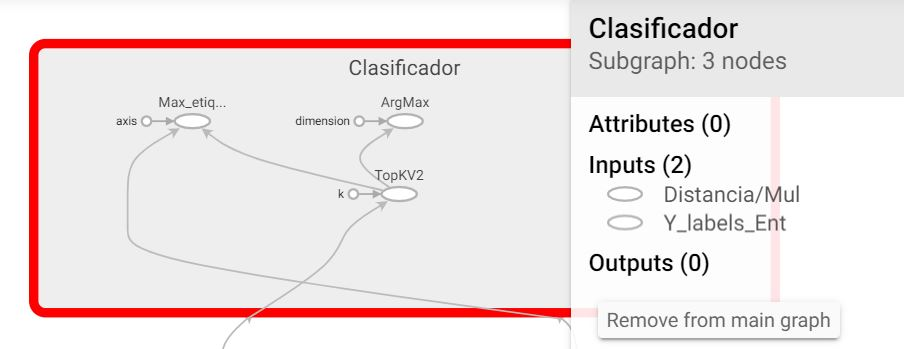

In [61]:
Image(filename='detalleScopeClasificador.jpg')

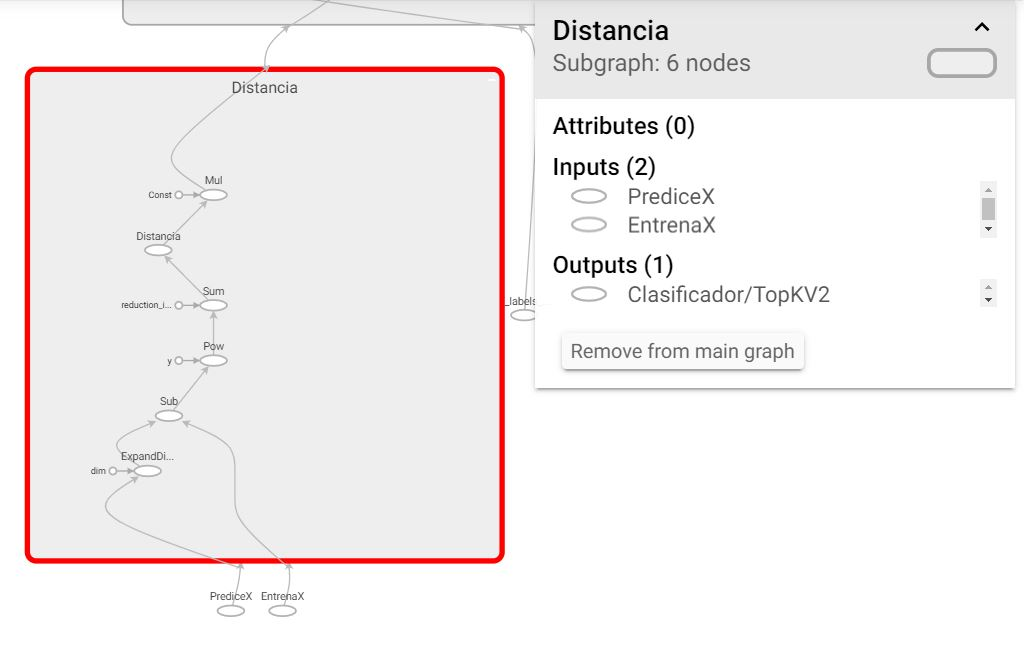

In [62]:
Image(filename='detalleScopeDistancia.jpg')